In [1]:
from warnings import filterwarnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.width",200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [33]:
### Metin Ön İşleme (Text Preprocessing) ###

# Wikipedia metinleri içeren veri seti
df = pd.read_csv("wiki_data.csv", index_col=0)
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [35]:
# Büyük küçük harf dönüşümü
df['text'] = df['text'].str.lower() # Tüm cümleleri küçülttük.
df['text']

1        anovo\n\nanovo (formerly a novo) is a computer...
2        battery indicator\n\na battery indicator (also...
3        bob pease\n\nrobert allen pease (august 22, 19...
4        cavnet\n\ncavnet was a secure military forum w...
5        clidar\n\nthe clidar is a scientific instrumen...
                               ...                        
10855    soundcast\n\nsoundcast llc is a privately fund...
10856    spectrum analyzer\n\na spectrum analyzer measu...
10857    telepresence technology\n\ntelepresence techno...
10858    trans-pacific profiler network\n\nthe trans-pa...
10859    transfer case\n\na transfer case is a part of ...
Name: text, Length: 10859, dtype: object

In [37]:
# Noktalama işlemleri (Punctuations)
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)
df['text']

1        anovo\n\nanovo formerly a novo is a computer s...
2        battery indicator\n\na battery indicator also ...
3        bob pease\n\nrobert allen pease august 22 1940...
4        cavnet\n\ncavnet was a secure military forum w...
5        clidar\n\nthe clidar is a scientific instrumen...
                               ...                        
10855    soundcast\n\nsoundcast llc is a privately fund...
10856    spectrum analyzer\n\na spectrum analyzer measu...
10857    telepresence technology\n\ntelepresence techno...
10858    transpacific profiler network\n\nthe transpaci...
10859    transfer case\n\na transfer case is a part of ...
Name: text, Length: 10859, dtype: object

In [39]:
# Numerik ifadeleri çıkarma
df['text'] = df['text'].str.replace('[\d]', '', regex=True)
df['text']

1        anovo\n\nanovo formerly a novo is a computer s...
2        battery indicator\n\na battery indicator also ...
3        bob pease\n\nrobert allen pease august  â â ju...
4        cavnet\n\ncavnet was a secure military forum w...
5        clidar\n\nthe clidar is a scientific instrumen...
                               ...                        
10855    soundcast\n\nsoundcast llc is a privately fund...
10856    spectrum analyzer\n\na spectrum analyzer measu...
10857    telepresence technology\n\ntelepresence techno...
10858    transpacific profiler network\n\nthe transpaci...
10859    transfer case\n\na transfer case is a part of ...
Name: text, Length: 10859, dtype: object

In [41]:
# Stop Words
import nltk

# İngilizce stopwords listesini yükleme
#nltk.download('stopwords')
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['text']

1        anovo anovo formerly novo computer services co...
2        battery indicator battery indicator also known...
3        bob pease robert allen pease august â â june a...
4        cavnet cavnet secure military forum became ope...
5        clidar clidar scientific instrument used measu...
                               ...                        
10855    soundcast soundcast llc privately funded compa...
10856    spectrum analyzer spectrum analyzer measures m...
10857    telepresence technology telepresence technolog...
10858    transpacific profiler network transpacific pro...
10859    transfer case transfer case part drivetrain fo...
Name: text, Length: 10859, dtype: object

In [45]:
## Rare Words (Nadir Kelimeler) ##
temp_df = pd.Series(' '.join(df['text']).split()).value_counts()
temp_df

used           29403
also           22951
use            16820
one            15929
â              15769
               ...  
scansoft           1
unhooked           1
hauspie            1
lernout            1
dashmounted        1
Name: count, Length: 180530, dtype: int64

In [55]:
# Metinde az geçen (1500'den az gibi) kelimeleri bulunuz ve metinden çıkarın
drops = temp_df[temp_df <= 1500]

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['text']

1        computer services company based founded public...
2        also known device information usually state ch...
3        â â june integrated circuit design technical d...
4        military became april part allows access groun...
5        used lower camera light form used light device...
                               ...                        
10855    company audio technologies commercial company ...
10856    input signal frequency within full frequency r...
10857    technology technology term used national techn...
10858    network network usually system wind informatio...
10859    transfer case transfer case part multiple vehi...
Name: text, Length: 10859, dtype: object

In [57]:
# Metinleri tokenize etmek (ümleleri Token'larına (Parçalarına) Ayrımak)

#nltk.download('punkt')
df['text'].apply(lambda x: TextBlob(x).words).head()

1    [computer, services, company, based, founded, ...
2    [also, known, device, information, usually, st...
3    [â, â, june, integrated, circuit, design, tech...
4    [military, became, april, part, allows, access...
5    [used, lower, camera, light, form, used, light...
Name: text, dtype: object

In [59]:
# Lemmatization (Kelimeleri Köklerine Ayrıma)
#nltk.download('wordnet')

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text']

1        computer service company based founded public ...
2        also known device information usually state ch...
3        â â june integrated circuit design technical d...
4        military became april part allows access groun...
5        used lower camera light form used light device...
                               ...                        
10855    company audio technology commercial company au...
10856    input signal frequency within full frequency r...
10857    technology technology term used national techn...
10858    network network usually system wind informatio...
10859    transfer case transfer case part multiple vehi...
Name: text, Length: 10859, dtype: object

In [61]:
## Metin Görselleştirme (Text Visualization) ##

tf = df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index() # Kelime frekansı
tf.columns = ["words", "tf"]
tf.sort_values("tf",ascending=False)

,words,tf
17,used,29403.00
19,system,26873.00
27,also,22951.00
29,use,16820.00
161,one,15929.00
...,...,...
235,length,1512.00
435,stage,1508.00
392,car,1506.00
171,wind,1502.00


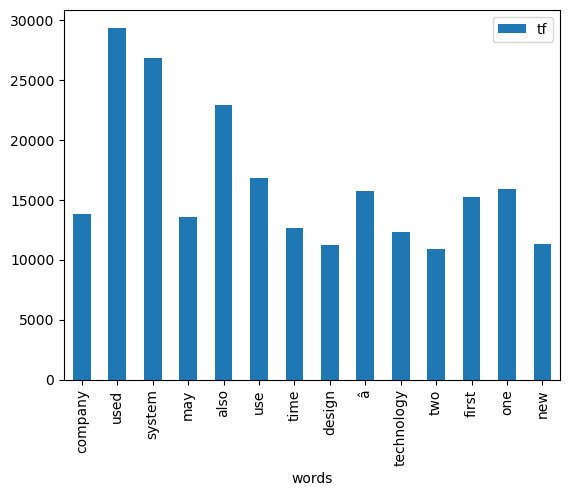

In [67]:
# Barplot 
tf[tf["tf"]  > 10000].plot.bar(x="words", y="tf")
plt.show()

In [73]:
## Kelime Bulutu (Word Cloud) ##

# Tüm reviewtextleri tek bir text haline getiriyoruz

text = " ".join(i for i in df.text)

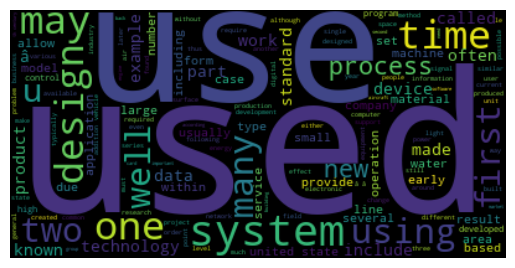

In [75]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

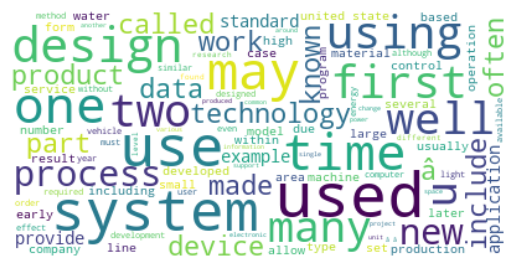

In [77]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()